In [1]:
from kuramoto import Kuramoto
from kuramoto.nmf import *
from kuramoto.db_metrics import *
from kuramoto.SDL_BCD import *
from kuramoto.SDL_SVP import *
from NNetwork import NNetwork as nn
import networkx as nx

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs

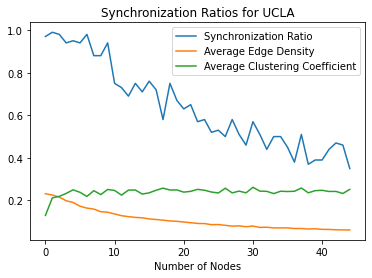

In [26]:
sampling_alg = 'pivot'
ntwk = 'UCLA26'
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])

Node_Num_Min = 5
Node_Num_Max = 50
num_samples = 100
NodeNum_List = []
Average_Sync_List = []
Average_Density_List = []
Average_CC_List = []

for i in range(Node_Num_Min, Node_Num_Max):
    NodeNum_List.append(Node_Num_Min+i)

for i in range(len(NodeNum_List)):
    k = NodeNum_List[i]   
    path = "../Data/Networks_all_NDL/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)    
    
    X, embs = G.get_patches(k=k, sample_size=num_samples, skip_folded_hom=True)
    graph_list = generate_nxg(X)
    
    Total_Sync = 0
    density = 0
    avg_cc = 0
    
    for G in graph_list:
        if nx.is_connected(G):
            nodes = nx.number_of_nodes(G)
            K = 2.5
            model = Kuramoto(coupling=K, dt=0.01, T=18, n_nodes=nodes, half_sync=False)
            adj_mat = nx.to_numpy_array(G)
            sim = model.run(adj_mat)
            if model.concentrated:
                Total_Sync += 1
            density += nx.density(G)
            avg_cc += nx.average_clustering(G)
    Average_Sync_Perc =  Total_Sync/num_samples
    Average_Sync_List.append(Average_Sync_Perc)
    Average_Density =  density/num_samples
    Average_Density_List.append(Average_Density)
    Average_CC =  avg_cc/num_samples
    Average_CC_List.append(Average_CC)
plt.plot(Average_Sync_List, label = "Synchronization Ratio")
plt.plot(Average_Density_List, label = "Average Edge Density")
plt.plot(Average_CC_List, label = "Average Clustering Coefficient")
plt.legend()
plt.xlabel('Number of Nodes')
plt.title('Synchronization Ratios for UCLA')
plt.show()

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs

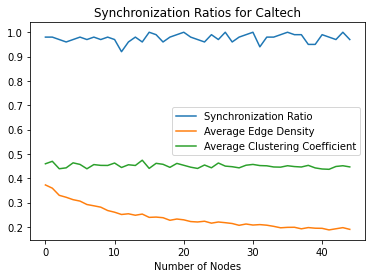

In [27]:
sampling_alg = 'pivot'
ntwk = 'Caltech36'
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])

Node_Num_Min = 5
Node_Num_Max = 50
num_samples = 100
NodeNum_List = []
Average_Sync_List = []
Average_Density_List = []
Average_CC_List = []

for i in range(Node_Num_Min, Node_Num_Max):
    NodeNum_List.append(Node_Num_Min+i)

for i in range(len(NodeNum_List)):
    k = NodeNum_List[i]   
    path = "../Data/Networks_all_NDL/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)    
    
    X, embs = G.get_patches(k=k, sample_size=num_samples, skip_folded_hom=True)
    graph_list = generate_nxg(X)
    
    Total_Sync = 0
    density = 0
    avg_cc = 0
    
    for G in graph_list:
        if nx.is_connected(G):
            nodes = nx.number_of_nodes(G)
            K = 1
            model = Kuramoto(coupling=K, dt=0.01, T=18, n_nodes=nodes, half_sync=False)
            adj_mat = nx.to_numpy_array(G)
            sim = model.run(adj_mat)
            if model.concentrated:
                Total_Sync += 1
            density += nx.density(G)
            avg_cc += nx.average_clustering(G)
    Average_Sync_Perc =  Total_Sync/num_samples
    Average_Sync_List.append(Average_Sync_Perc)
    Average_Density =  density/num_samples
    Average_Density_List.append(Average_Density)
    Average_CC =  avg_cc/num_samples
    Average_CC_List.append(Average_CC)
plt.plot(Average_Sync_List, label = "Synchronization Ratio")
plt.plot(Average_Density_List, label = "Average Edge Density")
plt.plot(Average_CC_List, label = "Average Clustering Coefficient")
plt.legend()
plt.xlabel('Number of Nodes')
plt.title('Synchronization Ratios for Caltech')
plt.show()

In [20]:
NWS = nx.newman_watts_strogatz_graph(20000, 1000, 0.67)
new_nodes = {e: n for n, e in enumerate(NWS.nodes, start=1)}
new_edges = [(new_nodes[e1], new_nodes[e2]) for e1, e2 in NWS.edges]
edgelist = []
for i in range(len(new_edges)):
    temp = [str(new_edges[i][0]), str(new_edges[i][1])]
    edgelist.append(temp)
G = nn.NNetwork()
G.add_edges(edgelist)

num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs induced on k-paths: 100
num of subgraphs

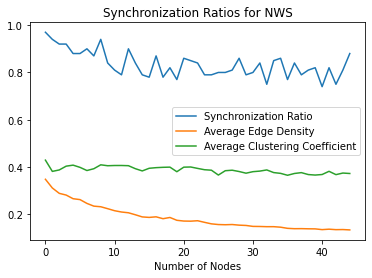

In [28]:
sampling_alg = 'pivot'

Node_Num_Min = 5
Node_Num_Max = 50
num_samples = 100
NodeNum_List = []
Average_Sync_List = []
Average_Density_List = []
Average_CC_List = []

for i in range(Node_Num_Min, Node_Num_Max):
    NodeNum_List.append(Node_Num_Min+i)

for i in range(len(NodeNum_List)):
    k = NodeNum_List[i]
    
    G = nn.NNetwork()
    G.add_edges(edgelist)
    X, embs = G.get_patches(k=k, sample_size=num_samples, skip_folded_hom=True)
    graph_list = generate_nxg(X)
    
    Total_Sync = 0
    density = 0
    avg_cc = 0
    
    for G in graph_list:
        if nx.is_connected(G):
            nodes = nx.number_of_nodes(G)
            K = 0.8
            model = Kuramoto(coupling=K, dt=0.01, T=18, n_nodes=nodes, half_sync=False)
            adj_mat = nx.to_numpy_array(G)
            sim = model.run(adj_mat)
            if model.concentrated:
                Total_Sync += 1
            density += nx.density(G)
            avg_cc += nx.average_clustering(G)
    Average_Sync_Perc =  Total_Sync/num_samples
    Average_Sync_List.append(Average_Sync_Perc)
    Average_Density =  density/num_samples
    Average_Density_List.append(Average_Density)
    Average_CC =  avg_cc/num_samples
    Average_CC_List.append(Average_CC)
plt.plot(Average_Sync_List, label = "Synchronization Ratio")
plt.plot(Average_Density_List, label = "Average Edge Density")
plt.plot(Average_CC_List, label = "Average Clustering Coefficient")
plt.legend()
plt.xlabel('Number of Nodes')
plt.title('Synchronization Ratios for NWS')
plt.show()

In [29]:
Node_Num_Min = 5
Node_Num_Max = 50
num_samples = 100
NodeNum_List = []
Average_Sync_List = []
Average_Density_List = []
Average_CC_List = []

for i in range(Node_Num_Min, Node_Num_Max):
    NodeNum_List.append(Node_Num_Min+i)

In [30]:
NodeNum_List

[10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54]

In [57]:
sampling_alg = 'pivot'
ntwk = 'UCLA26'
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
  
path = "../Data/Networks_all_NDL/" + str(ntwk) + '.txt'
G = nn.NNetwork()
G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)

edge_list = G.get_edges()
G = nx.from_edgelist(edge_list)

Number of Nodes: 20467
Number of Edges: 747613


TypeError: '<' not supported between instances of 'Graph' and 'int'

In [58]:
print(f"Number of Nodes: {G.number_of_nodes()}")
print(f"Number of Edges: {G.number_of_edges()}")
# print(f"Number of Cliques: {nx.number_of_cliques(G)}")
# print(f"Number of Isomorphic Trees: {nx.number_of_nonisomorphic_trees(G)}")
print(f"Number of Self Loops: {nx.number_of_selfloops(G)}")
print(f"Average Clustering Coefficient: {nx.average_clustering(G)}")
print(f"Average Edge Density: {nx.density(G)}")

Number of Nodes: 20467
Number of Edges: 747613
Number of Self Loops: 0
Average Clustering Coefficient: 0.21489390521928484
Average Edge Density: 0.003569601051640806


In [59]:
sampling_alg = 'pivot'
ntwk = 'Caltech36'
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])

path = "../Data/Networks_all_NDL/" + str(ntwk) + '.txt'
G = nn.NNetwork()
G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)

edge_list = G.get_edges()
G = nx.from_edgelist(edge_list)

print(f"Number of Nodes: {G.number_of_nodes()}")
print(f"Number of Edges: {G.number_of_edges()}")
# print(f"Number of Cliques: {nx.number_of_cliques(G)}")
# print(f"Number of Isomorphic Trees: {nx.number_of_nonisomorphic_trees(G)}")
print(f"Number of Self Loops: {nx.number_of_selfloops(G)}")
print(f"Average Clustering Coefficient: {nx.average_clustering(G)}")
print(f"Average Edge Density: {nx.density(G)}")

Number of Nodes: 769
Number of Edges: 16656
Number of Self Loops: 0
Average Clustering Coefficient: 0.4092943904851722
Average Edge Density: 0.05640442132639792


In [61]:
NWS = nx.newman_watts_strogatz_graph(20000, 1000, 0.67, seed=42)

print(f"Number of Nodes: {NWS.number_of_nodes()}")
print(f"Number of Edges: {NWS.number_of_edges()}")
# print(f"Number of Cliques: {nx.number_of_cliques(NWS)}")
# print(f"Number of Isomorphic Trees: {nx.number_of_nonisomorphic_trees(NWS)}")
print(f"Number of Self Loops: {nx.number_of_selfloops(NWS)}")
print(f"Average Clustering Coefficient: {nx.average_clustering(NWS)}")
print(f"Average Edge Density: {nx.density(NWS)}")

Number of Nodes: 20000
Number of Edges: 16702185
Number of Self Loops: 0
Average Clustering Coefficient: 0.30920790378000057
Average Edge Density: 0.08351510075503775


### Classification

In [62]:
sampling_alg = 'pivot'

ntwk = 'UCLA26' # COVID_PPI, Wisconsin87, Caltech36, UCLA26
ntwk_nonumber = ''.join([i for i in ntwk if not i.isdigit()])
save_folder = 'images/'
k = 50

path = "../Data/Networks_all_NDL/" + str(ntwk) + '.txt'
G = nn.NNetwork()
G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
print('num nodes in G', len(G.nodes()))
print('num edges in G', len(G.get_edges()))

num nodes in G 20467
num edges in G 1495226


num of subgraphs induced on k-paths: 2500
X.shape (2500, 2500)


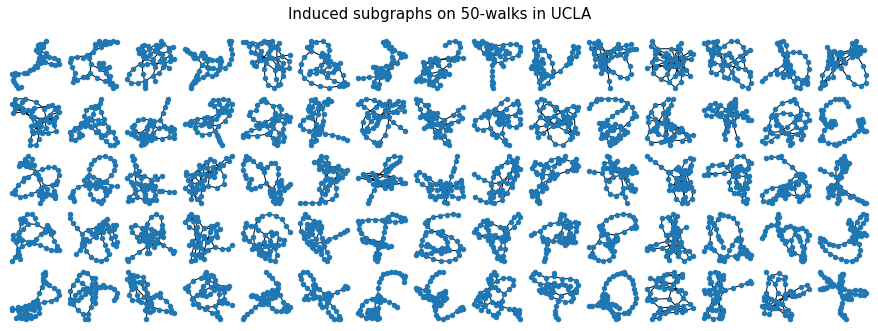

In [63]:
X, embs = G.get_patches(k=k, sample_size=2500, skip_folded_hom=True)

display_graphs(title='Induced subgraphs on {}-walks in {}'.format(k, ntwk_nonumber),
                 save_path=save_folder + ntwk_nonumber + "_subgraphs_"+ str(sampling_alg) + "_walk", 
                 data = [X, embs],
                 grid_shape = [5, 15],
                 fig_size = [15, 5],
                 show_importance=False)

In [64]:
graph_list = generate_nxg(X)
print(f"num of graphs: {len(graph_list)}")

num of graphs: 2500


## Just adjacency matrix

In [82]:
nodes = int(np.sqrt(X.shape[0]))
df = pd.DataFrame()
K = 1

for G in graph_list:
        
    adj_mat = nx.to_numpy_array(G)
    # temp = pd.DataFrame(np.array(nx.adjacency_matrix(G).todense().flatten('C')))
        
    model = Kuramoto(coupling=K, dt=0.01, T=18, n_nodes=nodes, half_sync=False)

    sim = model.run(adj_mat)
    arr = sim.T[-1]
    conc = pd.DataFrame(pd.Series(synchronization(arr)), columns=['Synchronized'])
            
    # temp = pd.concat([temp, conc], axis=1)

    # df = pd.concat([df, temp], ignore_index=True)
        
    g2v = Graph2Vec(wl_iterations = 5, dimensions = 8)
    g2v.fit(graph_list)
    embed = g2v.get_embedding()
    df_g2v = pd.DataFrame(embed, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8'])
    
    df = pd.concat([df_g2v, conc], axis=1)
    
df

KeyboardInterrupt: 

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

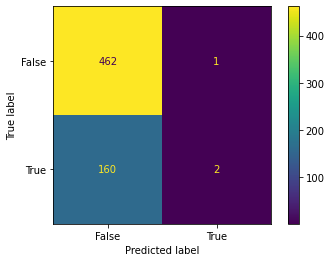

Precision: 0.667
Recall: 0.012
F1: 0.024
Accuracy: 0.742


In [81]:
clf = GradientBoostingClassifier(n_estimators=100, 
                                 learning_rate=0.1, 
                                 max_depth=1, 
                                 random_state=0).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
model_metrics(clf, Y_test, Y_pred)